Terceiro projeto de Inteligência artificial

Alunos: Lucas Garavaglia, Milena Santos

Link: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

## imports necessários

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

#### Carregamento do Dataset

In [191]:
init_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv")
# dataset.info()

Identificação de outliers

#### Pré processamento

<AxesSubplot:xlabel='Age'>

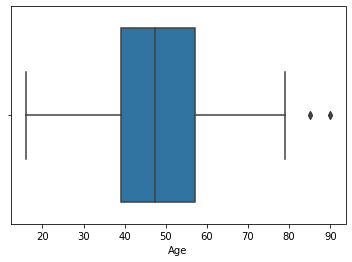

In [192]:
sns.boxplot(x=init_dataset['Age'])

Remoção de valores faltantes e dados duplicados.

In [194]:
dataset = init_dataset.dropna() #Fazendo uma observação do dataset foi notado que não 
                                #existem valores nulos, portanto esse método não esta fazendo nada.
                        
# dataset = dataset.drop_duplicates() 
#Após a remoção dos valores duplicados foi notado que a acurácia dos modelos cairam,
#plotando um gráfico de proporção foi notado também que os dados estão desbalanceados,
#portanto fio optado por não remover os duplicados a fim de manter o dataset balanceado.

indxs = []
for index,x in enumerate(dataset['Age']):
    if(x < 20 or x > 65):
        indxs.append(index)
        
dataset.drop(indxs,axis=0,inplace=True)

dataset.reset_index(inplace=True, drop=True)

In [128]:
def proportionDataset(dataset):
    target_count = dataset["class"].value_counts()
    print('Class 0:', target_count[0])
    print('Class 1:', target_count[1])
    print('Proporção:', round(target_count[1] / target_count[0], 2), ': 1')
    target_count.plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);


In [ ]:
# proportionDataset(dataset)
# proportionDataset(init_dataset)

#### Foi necessário a conversão dos dados para boolean poís a biblioteca não aceita tipo str

In [195]:
dataset['class'] = [1 if x == 'Positive' else 0 for x in dataset['class']]
dataset['Gender'] = [1 if x == 'Male' else 0 for x in dataset['Gender']]
dataset['Polyuria'] = [1 if x == 'Yes' else 0 for x in dataset['Polyuria']]
dataset['Polydipsia'] = [1 if x == 'Yes' else 0 for x in dataset['Polydipsia']]
dataset['weakness'] = [1 if x == 'Yes' else 0 for x in dataset['weakness']]
dataset['Polyphagia'] = [1 if x == 'Yes' else 0 for x in dataset['Polyphagia']]
dataset['Itching'] = [1 if x == 'Yes' else 0 for x in dataset['Itching']]
dataset['Irritability'] = [1 if x == 'Yes' else 0 for x in dataset['Irritability']]
dataset['Alopecia'] = [1 if x == 'Yes' else 0 for x in dataset['Alopecia']]
dataset['Obesity'] = [1 if x == 'Yes' else 0 for x in dataset['Obesity']]
dataset['delayed healing'] = [1 if x == 'Yes' else 0 for x in dataset['delayed healing']]
dataset['partial paresis'] = [1 if x == 'Yes' else 0 for x in dataset['partial paresis']]
dataset['muscle stiffness'] = [1 if x == 'Yes' else 0 for x in dataset['muscle stiffness']]
dataset['Genital thrush'] = [1 if x == 'Yes' else 0 for x in dataset['Genital thrush']]
dataset['visual blurring'] = [1 if x == 'Yes' else 0 for x in dataset['visual blurring']]
dataset['sudden weight loss'] = [1 if x == 'Yes' else 0 for x in dataset['sudden weight loss']]

In [196]:
def treeDecision(X_train, y_train):
    """
    Função que cria um árvore de decisão e retorna o modelo treinado.
    """
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model

In [197]:
def RForestDecision(X_train,  y_train):
    """
    Função que cria um classificador Random Florest e retorna o modelo treinado.
    """
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model

In [198]:
def KNN(X_train,  y_train):
    """
    Função que cria um classificador knn e retorna o modelo treinado.
    """
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    return model

Separação dos dados para treino e test

In [199]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(["class"], axis=1), dataset["class"], test_size=0.3)

In [203]:
model_TD = treeDecision(X_train, y_train )
model_RF = RForestDecision(X_train, y_train)
model_KNN = KNN(X_train, y_train)

In [209]:
print(accuracy_score(y_test, model_TD.predict(X_test))*100)
print(accuracy_score(y_test, model_RF.predict(X_test))*100)
print(accuracy_score(y_test, model_KNN.predict(X_test))*100)

92.90780141843972
97.87234042553192
82.97872340425532


Matriz de confusão

In [210]:
def confusionMatrix(y_test,y_pred):
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print('Confusion matrix:\n', cm)
    return cm

def showConfusionMatrix(y_test,y_pred):
    conf_mat = confusionMatrix(y_test,y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

Confusion matrix:
 [[56  2]
 [ 1 82]]


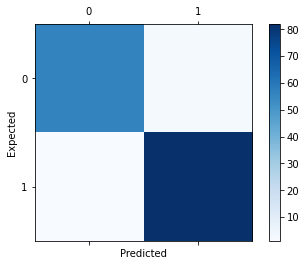

Confusion matrix:
 [[53  5]
 [ 5 78]]


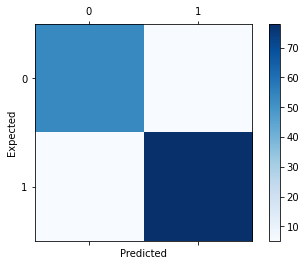

Confusion matrix:
 [[54  4]
 [20 63]]


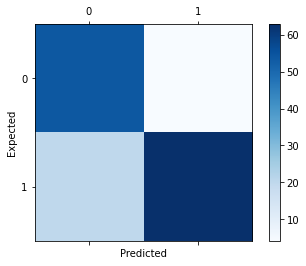

In [211]:
showConfusionMatrix(y_test,model_RF.predict(X_test))
showConfusionMatrix(y_test,model_TD.predict(X_test))
showConfusionMatrix(y_test,model_KNN.predict(X_test))